In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\demo_data\6.overlap.csv", header=None)
df

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0
...,...,...,...
95,6.7,3.0,1
96,6.3,2.5,1
97,6.5,3.0,1
98,6.2,3.4,1


In [3]:
df.shape

(100, 3)

In [4]:
df[[0,1]]

,0,1
0,7.0,3.2
1,6.4,3.2
2,6.9,3.1
3,5.5,2.3
4,6.5,2.8
...,...,...
95,6.7,3.0
96,6.3,2.5
97,6.5,3.0
98,6.2,3.4


<AxesSubplot:xlabel='0', ylabel='1'>

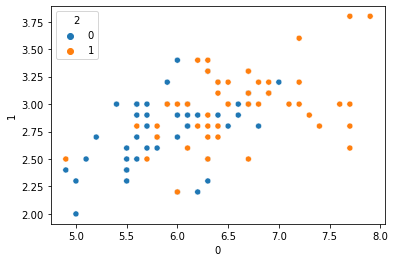

In [5]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],data=df)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.1)

In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [8]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [9]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [10]:
model = Sequential()
model.add(Dense(10,activation='relu',kernel_initializer = "he_normal", input_dim = 2))
model.add(Dropout(0.2))
model.add(Dense(9,activation='relu',kernel_initializer = "he_normal"))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu',kernel_initializer = "he_normal"))
model.add(Dropout(0.2))
model.add(Dense(6,activation='relu',kernel_initializer = "he_normal"))
model.add(Dropout(0.2))
model.add(Dense(4,activation='relu',kernel_initializer = "he_normal"))
model.add(Dropout(0.2))
model.add(Dense(3,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(2,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
save = model.fit(x_train, y_train, epochs = 100, validation_split= 0.2)

Epoch 1/100
3/3 [==============================] - 2s 109ms/step - loss: 0.6953 - accuracy: 0.4722 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6930 - accuracy: 0.5139 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6941 - accuracy: 0.5139 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6918 - accuracy: 0.5417 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6905 - accuracy: 0.6250 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6925 - accuracy: 0.5556 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

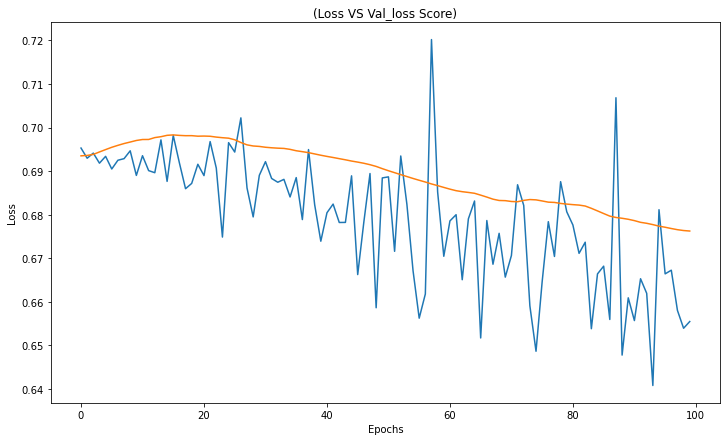

In [13]:
plt.figure(figsize=(12, 7))
plt.plot(save.history['loss'])
plt.plot(save.history['val_loss'])
plt.title("(Loss VS Val_loss Score)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [14]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 111ms/step


In [15]:
y_capf=np.where(y_pred>0.5,1,0)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.8

3888/3888 [==============================] - 5s 1ms/step


C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

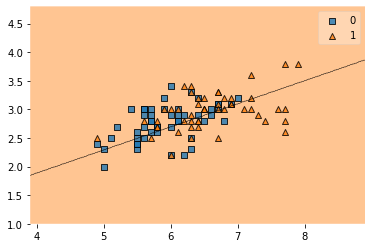

In [17]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)